# <center style='color:red'> `Spectral` clustering - Example using `iris` dataset</center>

## 1. Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn import metrics

## 2. Load `iris` dataset

In [2]:
iris = datasets.load_iris()
data = iris.data
targets = iris.target

In [3]:
data.shape # 150 samples and 4 features

(150, 4)

In [4]:
iris.feature_names # the names of 4 features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names # the names of targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

So, there are three different targets.

## 3. Create a dataframe

In [6]:
df = pd.DataFrame(data, columns=iris.feature_names)
df['target_names'] = targets # add targets to the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.target_names.value_counts()

0    50
1    50
2    50
Name: target_names, dtype: int64

So, each target (`setosa`, `versicolor` and `virginica`) is present 50 times in the `iris` dataset.

## 4. Separate features from the dataframe

In [8]:
features = df.iloc[:, :-1]
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
features.shape # same shape as 'data'

(150, 4)

## 5. Perform preprocessing

In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features) 

## 6. Scaled dataframe

In [11]:
df_scaled = pd.DataFrame(scaled, columns=iris.feature_names)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
df_scaled.shape

(150, 4)

## 7. Perform `spectral_clustering` considering 3 clusters

In [13]:
spec = SpectralClustering(n_clusters=3, assign_labels='discretize', affinity='rbf', random_state=3)
spec.fit(df_scaled)
preds = spec.labels_

## 8. Add two new columns to the scaled dataframe

In [14]:
df_scaled['ground_truth'] = targets
df_scaled['prediction'] = preds
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ground_truth,prediction
0,-0.900681,1.019004,-1.340227,-1.315444,0,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0,0
2,-1.385353,0.328414,-1.397064,-1.315444,0,0
3,-1.506521,0.098217,-1.283389,-1.315444,0,0
4,-1.021849,1.249201,-1.340227,-1.315444,0,0


In [15]:
df_scaled.shape

(150, 6)

In [16]:
print(df_scaled.ground_truth.unique())
print(df_scaled.prediction.unique())

[0 1 2]
[0 2 1]


## 9. Clustering comparison between ground truths and predictions

In [17]:
cm = metrics.confusion_matrix(targets, preds)

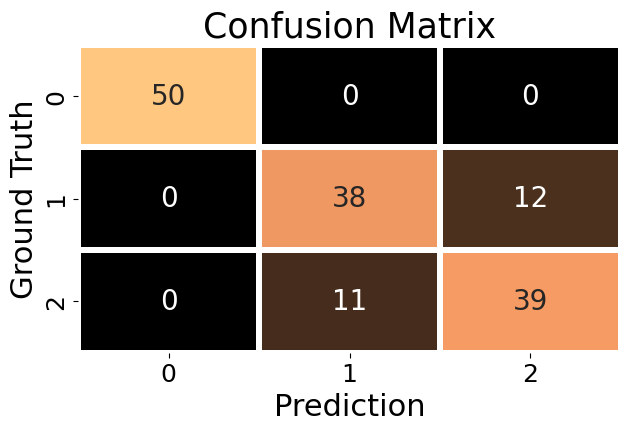

In [18]:
plt.figure(figsize=(7, 4))

sns.heatmap(cm, annot=True, fmt='d', linewidth=4, cbar=False, annot_kws={'size': 20}, cmap='copper')

plt.xlabel('Prediction', fontsize=22)
plt.ylabel('Ground Truth', fontsize=22)
plt.title('Confusion Matrix', fontsize=25)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

## 10. Calculate a few external validation metrics

In [19]:
print('Completeness Score (CS):', round(metrics.completeness_score(targets, preds), 5))
print('Mutual Information (MI) Score:', round(metrics.mutual_info_score(targets, preds), 5))

Completeness Score (CS): 0.67288
Mutual Information (MI) Score: 0.73915
